In [24]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

# PART 2 - DATA PREPERATION

In [25]:
## READ IN DATASET TO PANDAS DATAFRAME
column_names = ("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area_01","Wilderness_Area_02","Wilderness_Area_03","Wilderness_Area_04","Soil_Type_01","Soil_Type_02","Soil_Type_03","Soil_Type_04","Soil_Type_05","Soil_Type_06","Soil_Type_07","Soil_Type_08","Soil_Type_09","Soil_Type_10","Soil_Type_11","Soil_Type_12","Soil_Type_13","Soil_Type_14","Soil_Type_15","Soil_Type_16","Soil_Type_17","Soil_Type_18","Soil_Type_19","Soil_Type_20","Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30","Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40","Cover_Type")
soil = pd.read_table("covtype.data", sep=",", names=column_names)

In [26]:
## CHECK SHAPE OF DATA
soil.shape

(581012, 55)

In [27]:
soil.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [28]:
print (soil.dtypes)
## ALL IMPORTED DATATYPES ARE NUMERICAL. THEREFORE NO WHITESPACES/BROKEN STRINGS.

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_01                    int64
Wilderness_Area_02                    int64
Wilderness_Area_03                    int64
Wilderness_Area_04                    int64
Soil_Type_01                          int64
Soil_Type_02                          int64
Soil_Type_03                          int64
Soil_Type_04                          int64
Soil_Type_05                          int64
Soil_Type_06                          int64
Soil_Type_07                          int64
Soil_Type_08                          int64
Soil_Type_09                    

In [29]:
## CONVERT WILDERNESS TYPE, SOIL TYPE AND COVER TYPE TO CATEGORICAL DATA
for pos in range(10,55):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('category')
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null category
Wilderness_Area_02                    581012 non-null category
Wilderness_Area_03                    581012 non-null category
Wilderness_Area_04                    581012 non-null category
Soil_Type_01                         

In [30]:
## CHECK IF THERE ARE ANY MISSING VALUES
print ('MISSING VALUES : ' + str(soil.isnull().values.any()))

MISSING VALUES : False


In [31]:
## SANITY CHECKS FOR NUMERICAL COLUMNS

In [32]:
for col in soil.columns:
    if (soil[col].dtype.name == 'int64'):
        print ('Maximum value for',soil[col].name,'=',soil[col].max(axis=0), '\n')
        print ('Minimum value for',soil[col].name,'=',soil[col].min(axis=0), '\n')

Maximum value for Elevation = 3858 

Minimum value for Elevation = 1859 

Maximum value for Aspect = 360 

Minimum value for Aspect = 0 

Maximum value for Slope = 66 

Minimum value for Slope = 0 

Maximum value for Horizontal_Distance_To_Hydrology = 1397 

Minimum value for Horizontal_Distance_To_Hydrology = 0 

Maximum value for Vertical_Distance_To_Hydrology = 601 

Minimum value for Vertical_Distance_To_Hydrology = -173 

Maximum value for Horizontal_Distance_To_Roadways = 7117 

Minimum value for Horizontal_Distance_To_Roadways = 0 

Maximum value for Hillshade_9am = 254 

Minimum value for Hillshade_9am = 0 

Maximum value for Hillshade_Noon = 254 

Minimum value for Hillshade_Noon = 0 

Maximum value for Hillshade_3pm = 254 

Minimum value for Hillshade_3pm = 0 

Maximum value for Horizontal_Distance_To_Fire_Points = 7173 

Minimum value for Horizontal_Distance_To_Fire_Points = 0 



In [33]:
## SANITY CHECKS FOR CATEGORICAL COLUMNS

In [34]:
for col in soil.columns:
    if (soil[col].dtype.name == 'category'):
        print (soil[col].value_counts(), '\n')

0    320216
1    260796
Name: Wilderness_Area_01, dtype: int64 

0    551128
1     29884
Name: Wilderness_Area_02, dtype: int64 

0    327648
1    253364
Name: Wilderness_Area_03, dtype: int64 

0    544044
1     36968
Name: Wilderness_Area_04, dtype: int64 

0    577981
1      3031
Name: Soil_Type_01, dtype: int64 

0    573487
1      7525
Name: Soil_Type_02, dtype: int64 

0    576189
1      4823
Name: Soil_Type_03, dtype: int64 

0    568616
1     12396
Name: Soil_Type_04, dtype: int64 

0    579415
1      1597
Name: Soil_Type_05, dtype: int64 

0    574437
1      6575
Name: Soil_Type_06, dtype: int64 

0    580907
1       105
Name: Soil_Type_07, dtype: int64 

0    580833
1       179
Name: Soil_Type_08, dtype: int64 

0    579865
1      1147
Name: Soil_Type_09, dtype: int64 

0    548378
1     32634
Name: Soil_Type_10, dtype: int64 

0    568602
1     12410
Name: Soil_Type_11, dtype: int64 

0    551041
1     29971
Name: Soil_Type_12, dtype: int64 

0    563581
1     17431
Name: So

In [35]:
## I WANT TO PERFORM A SANITY CHECK FOR WILDERNESS AREAS....CAN A POINT HAVE MORE THAN 1 WILDERNESS AREA TYPES?
## IF NOT CAN WE ADD A NEW COLUMN (LIKE THE COVERTYPE COLUMN) WHERE THE COLUMN JUST RECORDS WHICH WILDERNESS AREA

for pos in range(10,14):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('int64')

soil['Wilderness_Type'] = soil['Wilderness_Area_01'] + soil['Wilderness_Area_02'] + soil['Wilderness_Area_03'] + soil['Wilderness_Area_04']

dup_rec = False
for i in range(soil['Wilderness_Type'].count()):
    if soil.at[i, 'Wilderness_Type'] != 1:
        dup_rec = True
        print ('Multiple Wilderness Areas detected in same row. Invalid record.')
        break

if dup_rec == False:
    print('No duplicate records found')    

No duplicate records found


In [36]:
for i in range(soil['Wilderness_Type'].count()):
    if soil.at[i, 'Wilderness_Area_01'] == 1:
        soil.at[i, 'Wilderness_Type'] = 1
    elif soil.at[i, 'Wilderness_Area_02'] == 1:
        soil.at[i, 'Wilderness_Type'] = 2
    elif soil.at[i, 'Wilderness_Area_03'] == 1:
        soil.at[i, 'Wilderness_Type'] = 3
    else: 
        soil.at[i, 'Wilderness_Type'] = 4


In [37]:
soil['Wilderness_Type'] = soil['Wilderness_Type'].astype('category')
soil['Wilderness_Type'].value_counts()

1    260796
3    253364
4     36968
2     29884
Name: Wilderness_Type, dtype: int64

In [38]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 56 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null int64
Wilderness_Area_02                    581012 non-null int64
Wilderness_Area_03                    581012 non-null int64
Wilderness_Area_04                    581012 non-null int64
Soil_Type_01                          581012 non-

In [39]:
for pos in range(14,54):
    soil[soil.columns[pos]] = soil[soil.columns[pos]].astype('int64')

soil['Soil_Type'] = 7
    

In [40]:
for pos in range(14,54):
    print (soil[soil.columns[pos]].value_counts())

0    577981
1      3031
Name: Soil_Type_01, dtype: int64
0    573487
1      7525
Name: Soil_Type_02, dtype: int64
0    576189
1      4823
Name: Soil_Type_03, dtype: int64
0    568616
1     12396
Name: Soil_Type_04, dtype: int64
0    579415
1      1597
Name: Soil_Type_05, dtype: int64
0    574437
1      6575
Name: Soil_Type_06, dtype: int64
0    580907
1       105
Name: Soil_Type_07, dtype: int64
0    580833
1       179
Name: Soil_Type_08, dtype: int64
0    579865
1      1147
Name: Soil_Type_09, dtype: int64
0    548378
1     32634
Name: Soil_Type_10, dtype: int64
0    568602
1     12410
Name: Soil_Type_11, dtype: int64
0    551041
1     29971
Name: Soil_Type_12, dtype: int64
0    563581
1     17431
Name: Soil_Type_13, dtype: int64
0    580413
1       599
Name: Soil_Type_14, dtype: int64
0    581009
1         3
Name: Soil_Type_15, dtype: int64
0    578167
1      2845
Name: Soil_Type_16, dtype: int64
0    577590
1      3422
Name: Soil_Type_17, dtype: int64
0    579113
1      1899
Name: S

In [41]:
dup_rec = False
for i in range(soil['Soil_Type'].count()):
    if soil.at[i, 'Soil_Type'] != 7:
        dup_rec = True
        print ('Multiple Soil Types detected in same row. Invalid record.')
        break

if dup_rec == False:
    print('No duplicate records found')    

No duplicate records found


In [42]:
soil['Soil_Type'] = 7

type_5 = [20,21]
type_2 = [22,35,36]
type_1 = [27,28,29,30,32,33,34,35,36]

for i in range(soil['Soil_Type'].count()):
    for j in type_5:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 5
    for j in type_2:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 2  
    for j in type_1:
        if soil.iat[i, j] == 1:
            soil.iat[i, 56] = 1

In [43]:
soil['Soil_Type'].value_counts()

7    467469
1    112112
2      1147
5       284
Name: Soil_Type, dtype: int64

# PART 2 - DATA EXPLORATION 

### A - EXPLORE EACH COLUMN

#### USING APPROPRIATE DESCRIPTIVE STATISTICS

In [44]:
# DESCRIPTIVE STATISTICS FOR NUMERICAL VALUES
soil.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Soil_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,5.831392
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,2.373232
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [45]:
# 'DESCRIPTIVE STATISTICS' NOT POSSIBLE FOR CATEGORICAL THEREFORE AN EXPLORATION OF PROPORTIONALITY EXPLORED

In [47]:
for col in soil.columns:
    if (soil[col].dtype.name == 'category'):
        print (soil[col].value_counts(normalize=True), '\n')

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64 

1    0.448865
3    0.436074
4    0.063627
2    0.051434
Name: Wilderness_Type, dtype: float64 



#### PLOT EACH COLUMN IN INDIVIDUAL GRAPHS

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


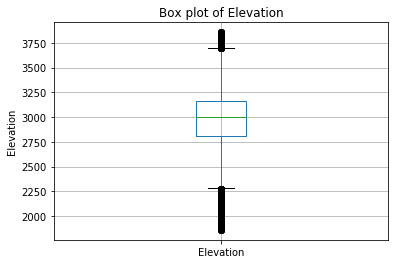

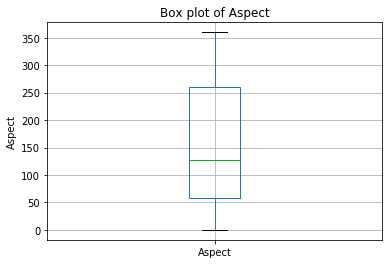

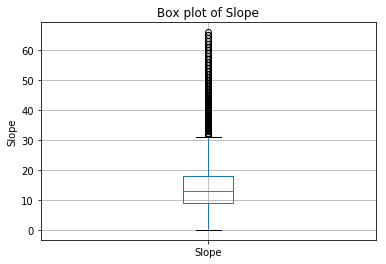

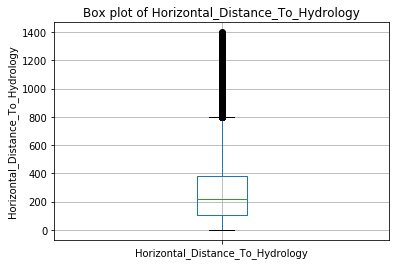

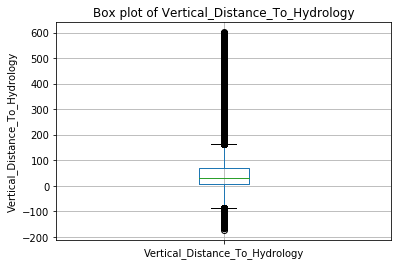

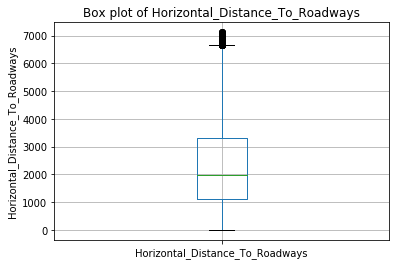

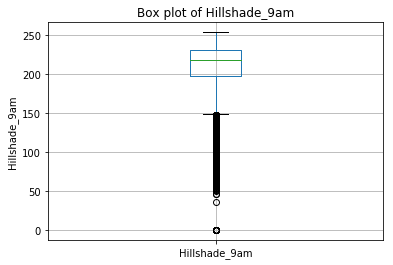

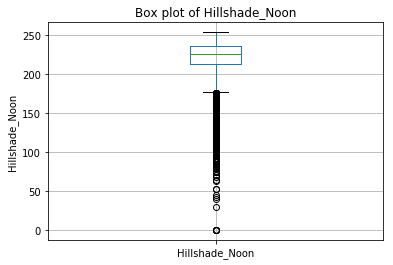

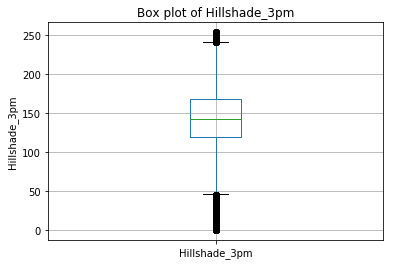

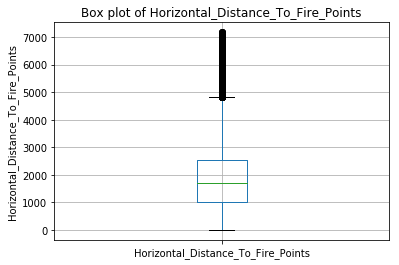

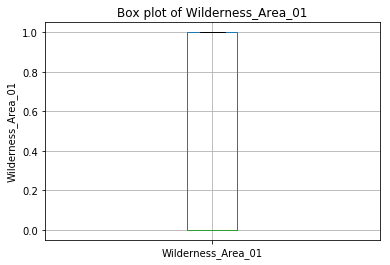

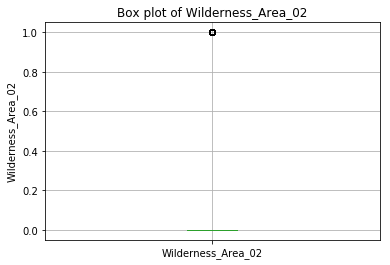

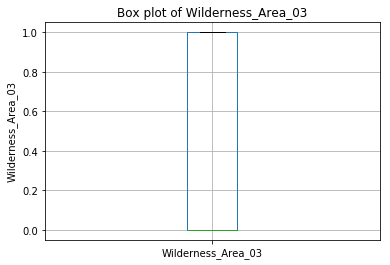

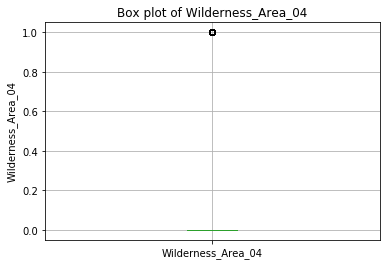

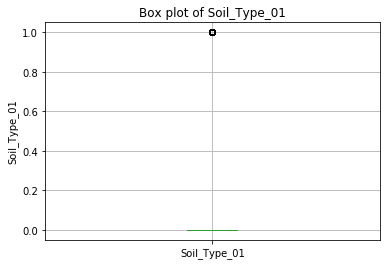

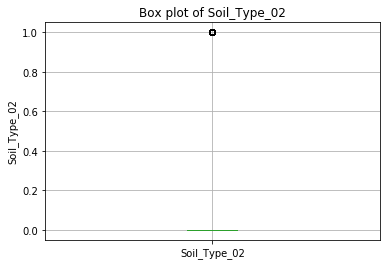

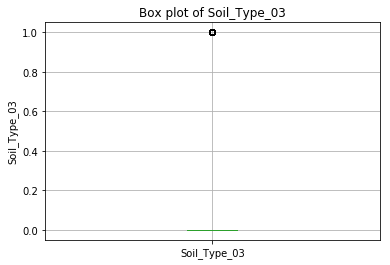

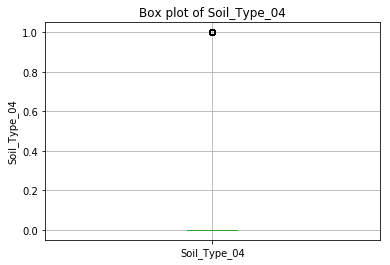

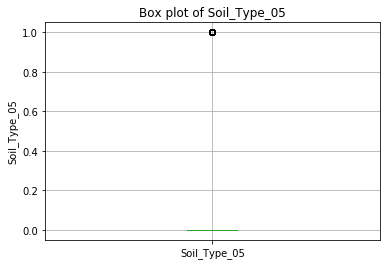

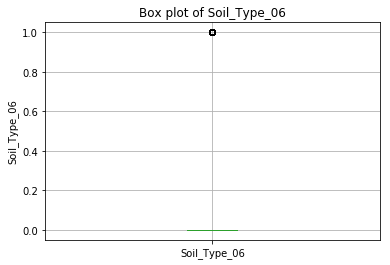

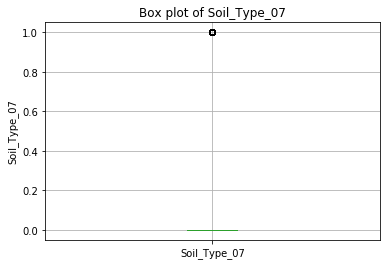

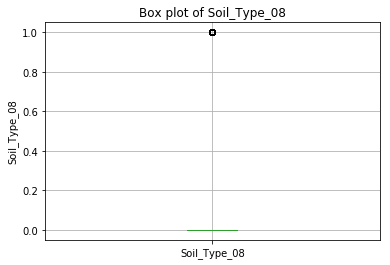

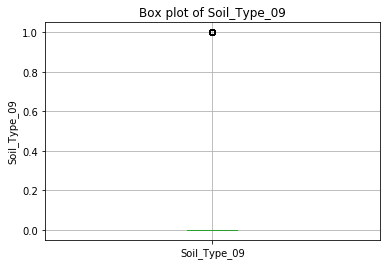

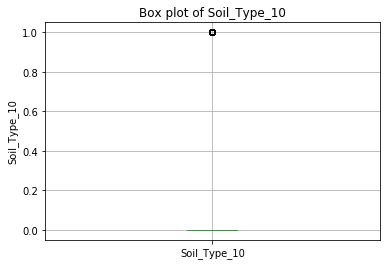

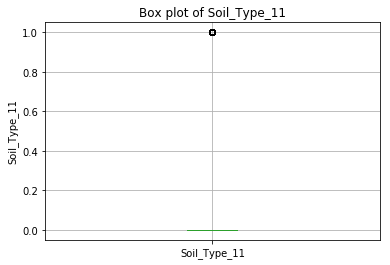

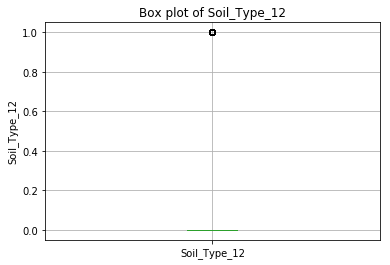

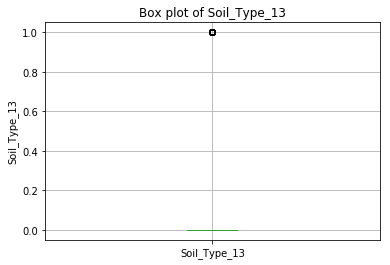

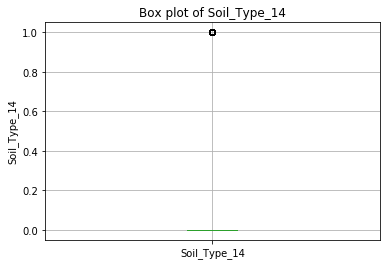

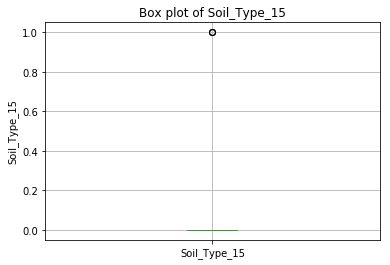

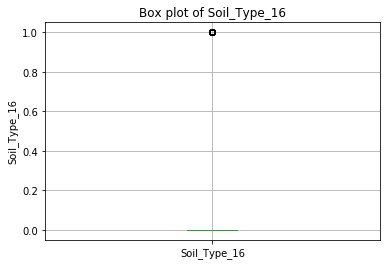

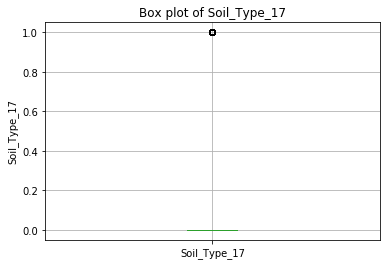

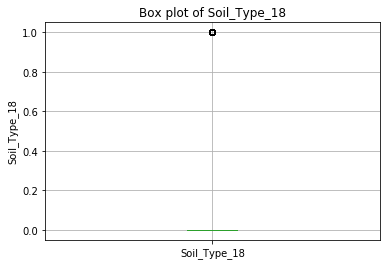

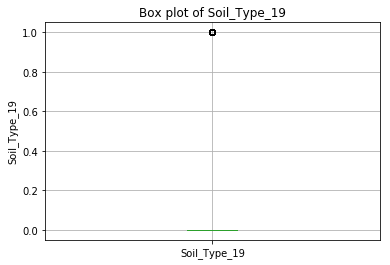

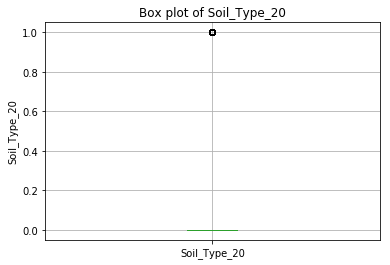

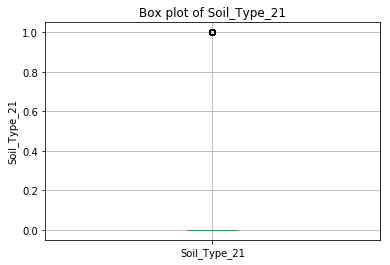

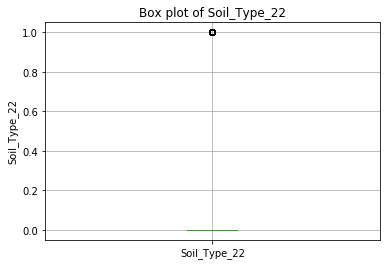

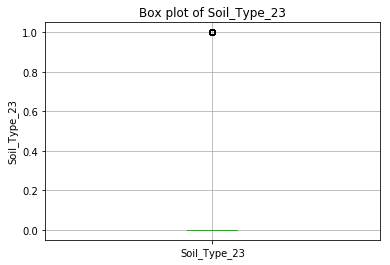

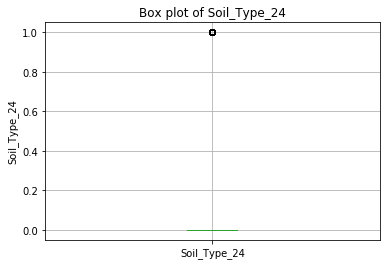

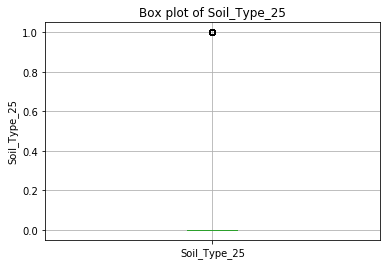

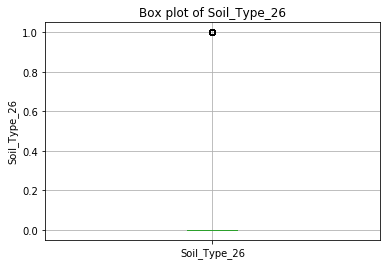

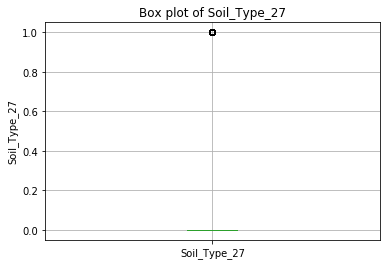

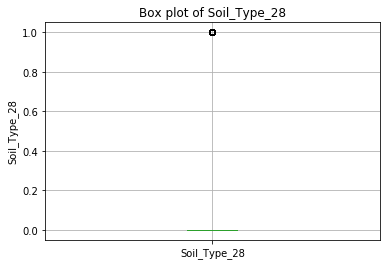

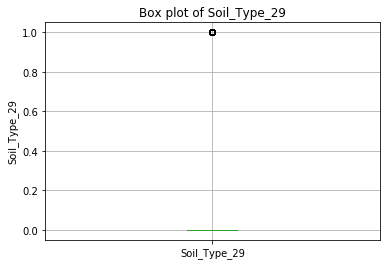

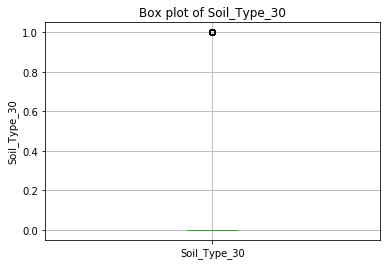

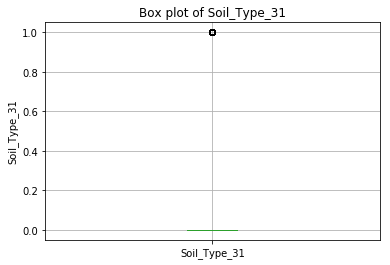

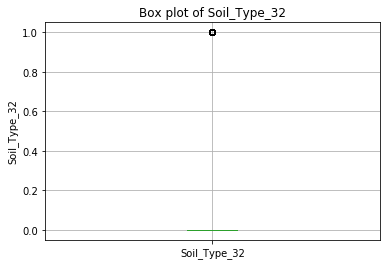

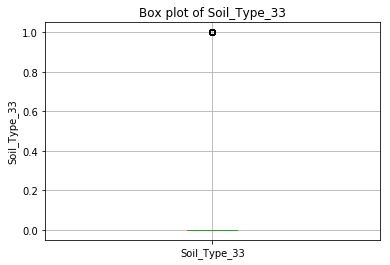

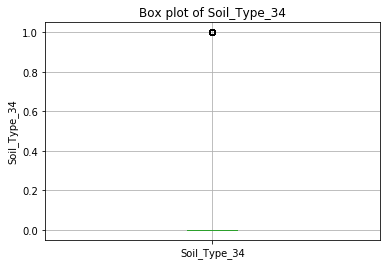

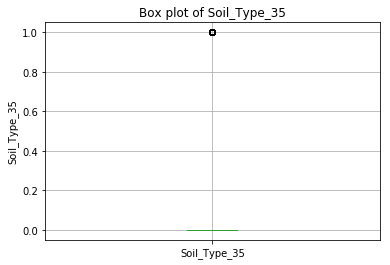

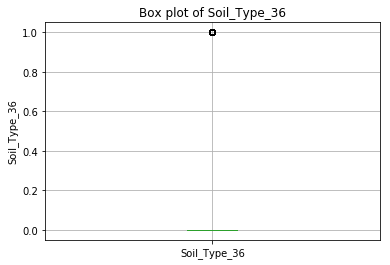

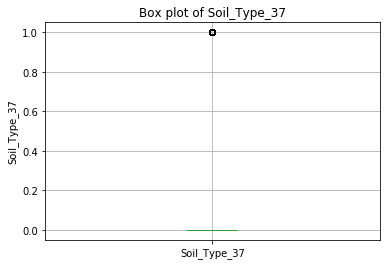

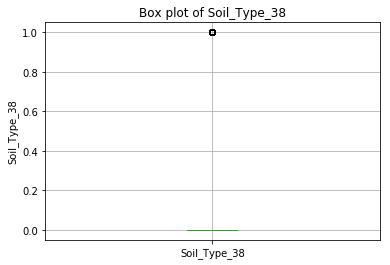

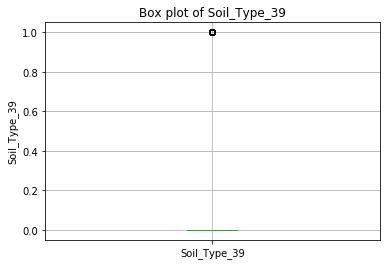

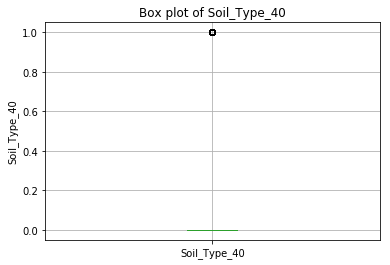

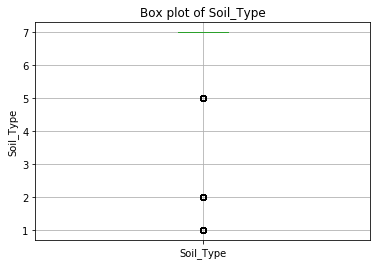

In [48]:
## BOXPLOT FOR NUMERICAL DATA EXPLORATION

for col in soil.columns:

    if (soil[col].dtype.name == 'int64'):
        title = 'Box plot of '+ col
        plt.figure(col)
        soil.boxplot(column=col)
        plt.title(title)
        plt.ylabel(col)       

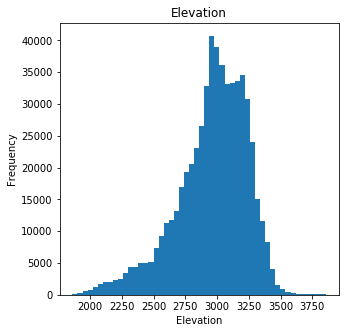

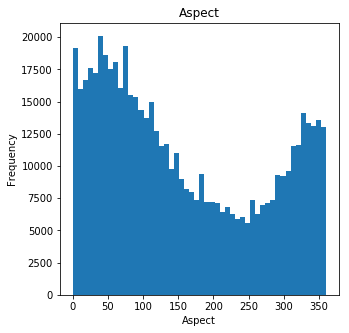

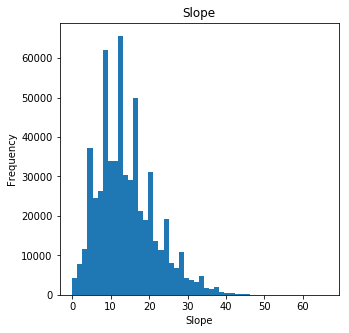

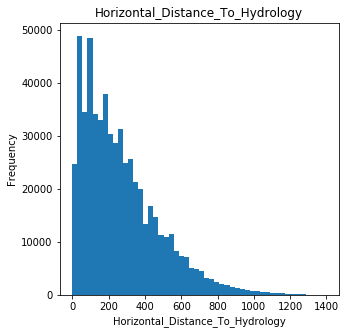

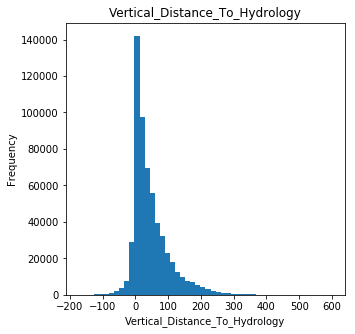

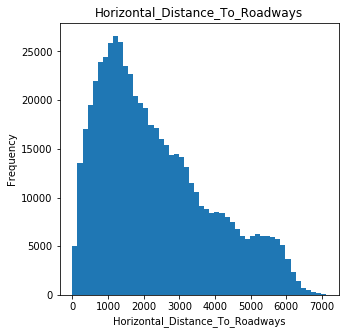

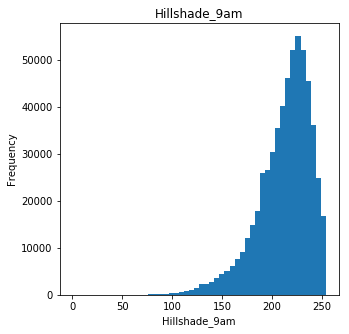

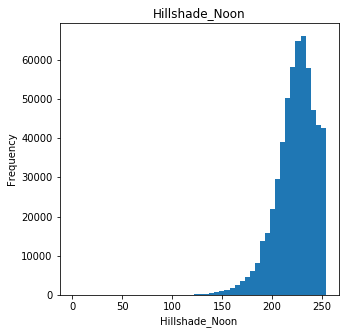

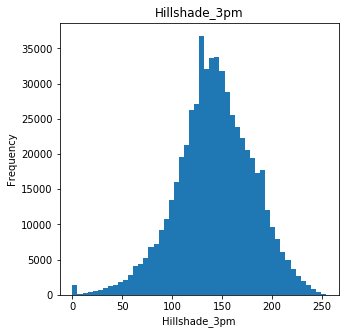

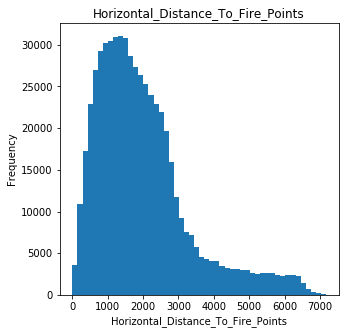

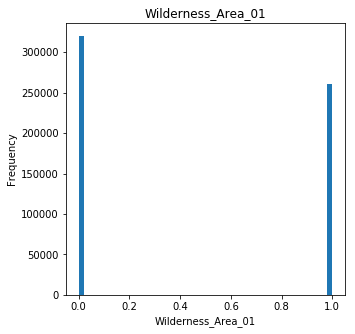

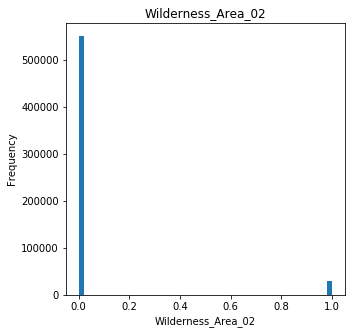

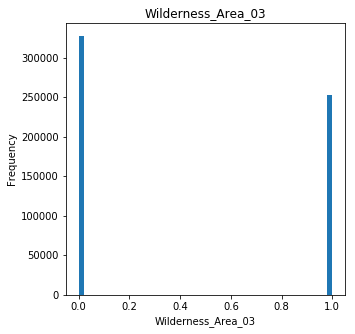

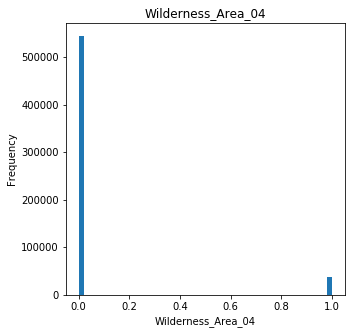

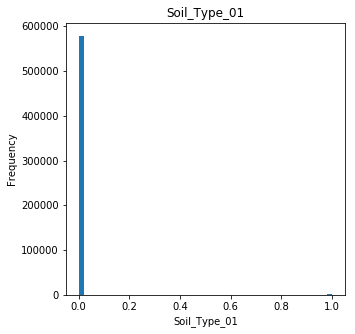

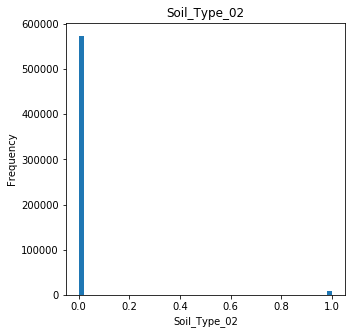

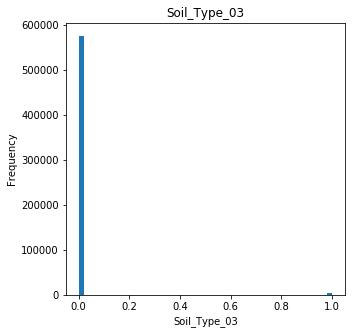

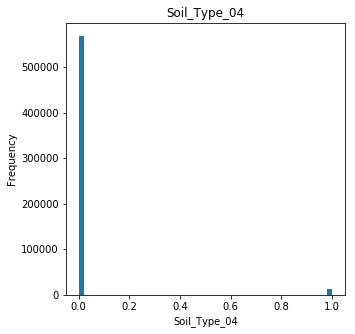

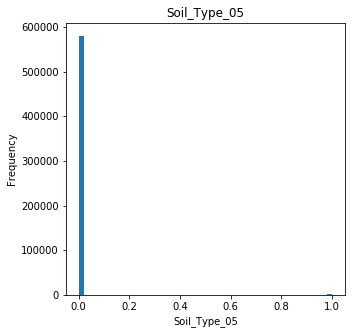

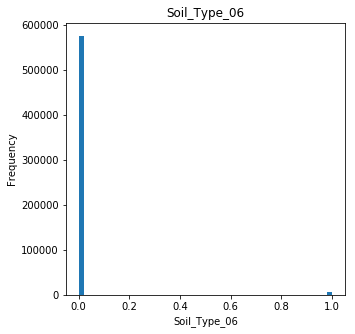

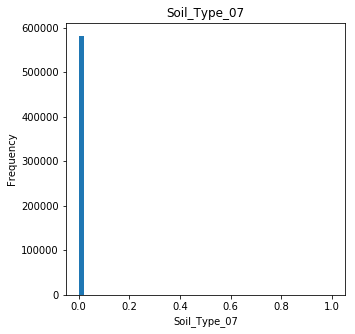

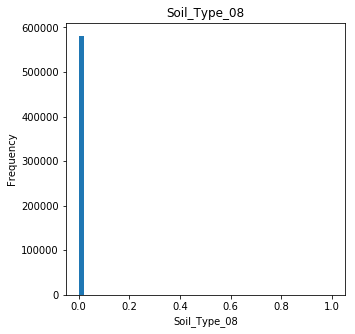

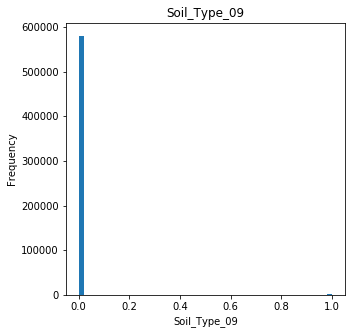

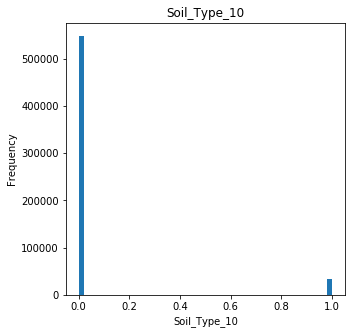

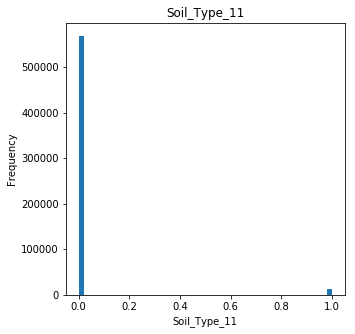

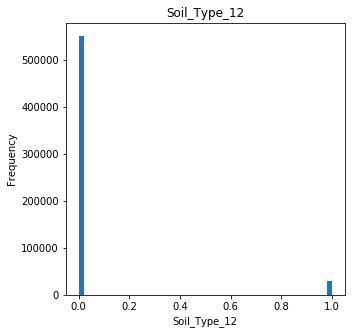

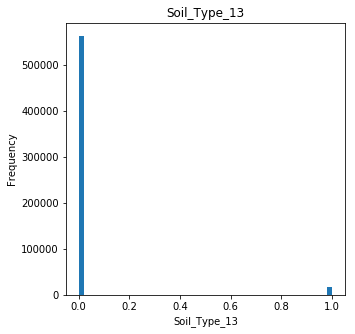

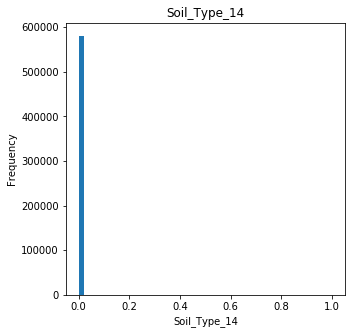

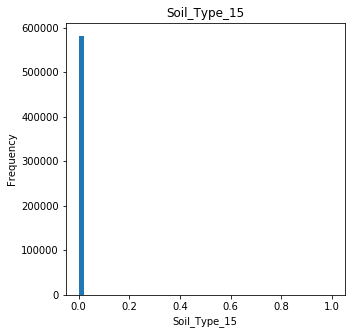

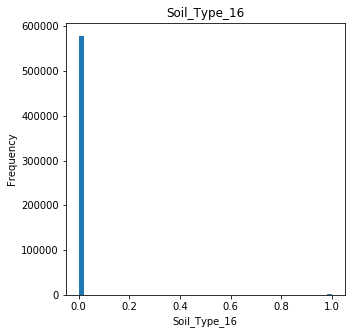

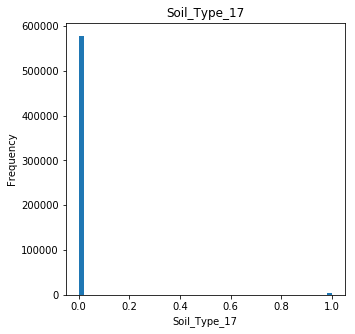

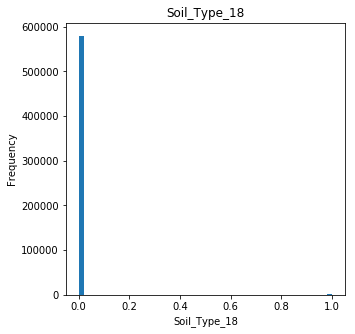

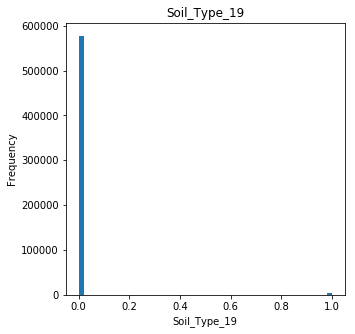

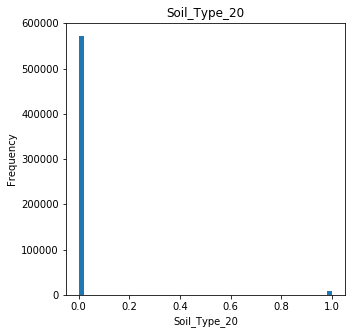

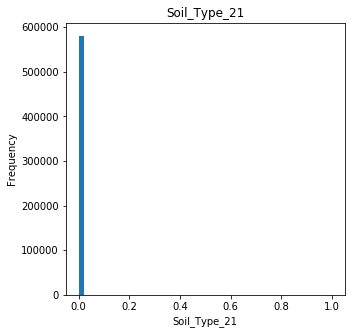

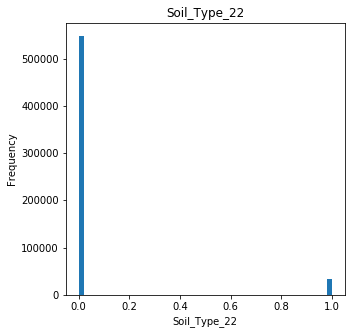

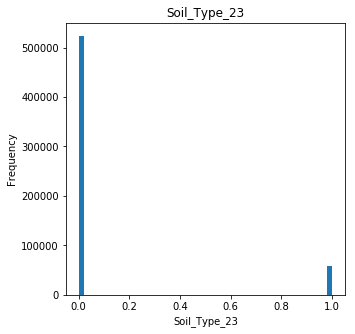

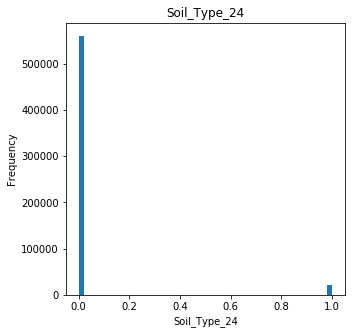

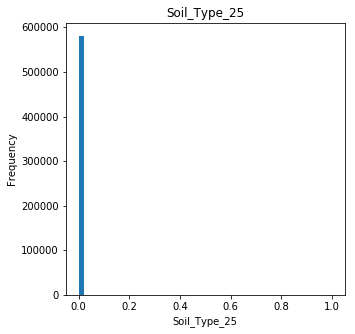

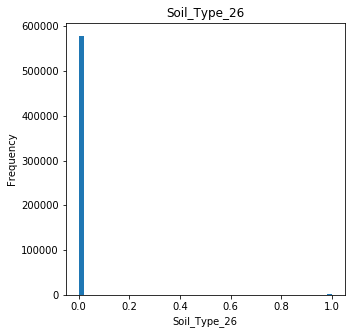

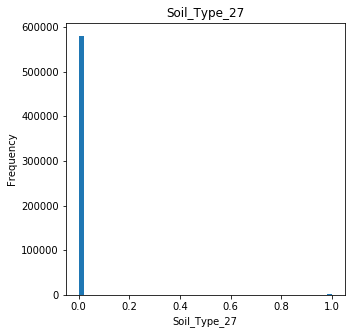

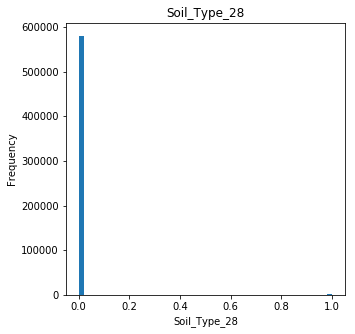

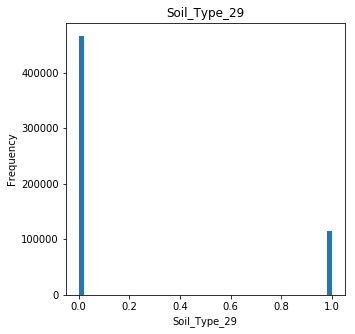

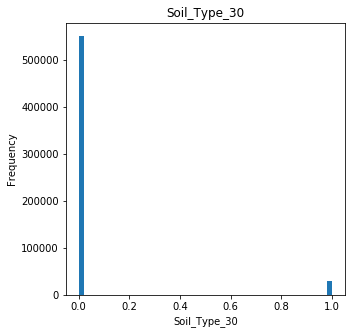

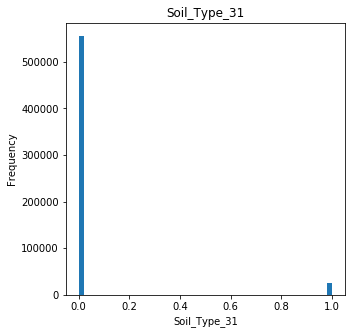

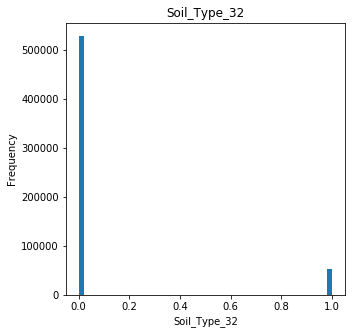

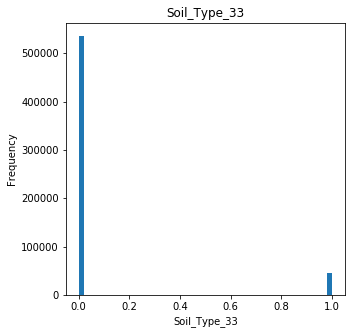

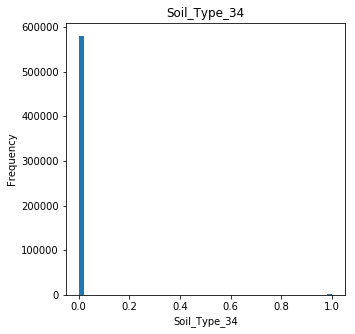

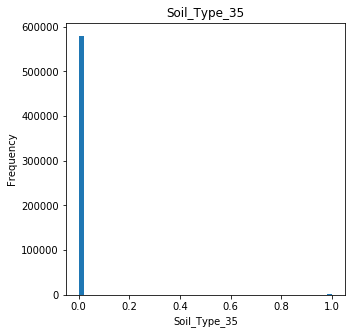

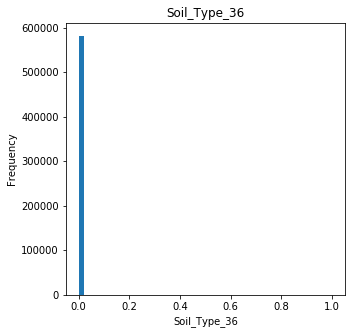

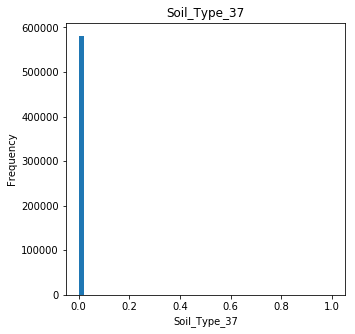

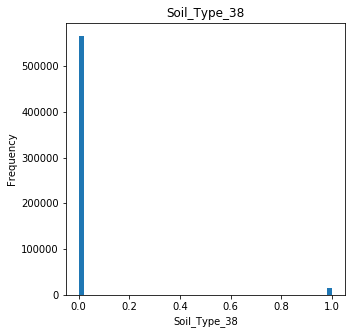

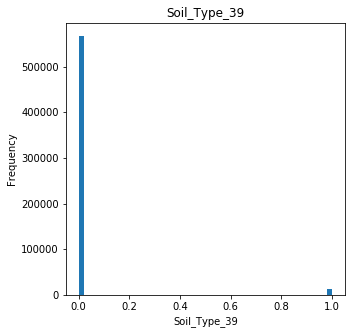

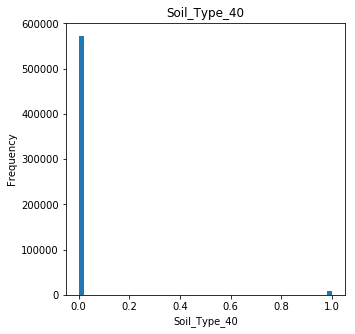

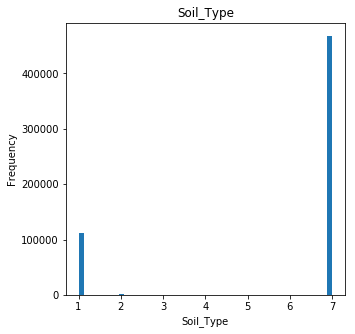

In [49]:
## HISTOGRAMS FOR NUMERICAL DATA EXPLORATION

for col in soil.columns:
    if (soil[col].dtype.name == 'int64'):
        plt.figure(figsize=(5, 5))
        soil[col].plot(kind='hist', bins=50)
        plt.title(col)
        plt.xlabel(col)
        axes = plt.gca()
        filename = str(soil[col].name)+"_distribution"
        plt.savefig(filename)
        plt.show()


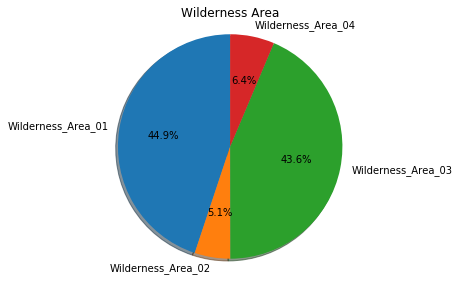

In [50]:
# TEMPORARILY CONVERT WILDERNESS AREA TO NUMERIC TO CREATE PIE CHART

soil_copy = soil.copy(deep=True)

columns = []
values = []

for pos in range(10,14):
    soil_copy[soil_copy.columns[pos]] = soil_copy[soil_copy.columns[pos]].astype('int64')
    columns.append(soil_copy.columns[pos])
    values.append(soil_copy[soil_copy.columns[pos]].sum())
    
plt.pie(values, autopct='%1.1f%%',shadow=True, labels=columns, startangle=90)
plt.axis('equal')
plt.title('Wilderness Area')
plt.tight_layout()
plt.show()

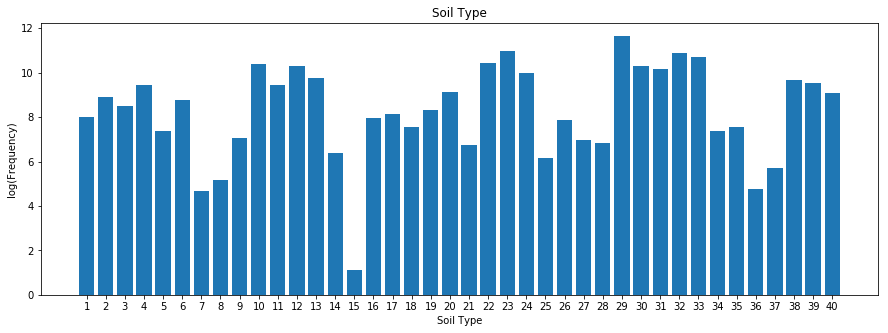

In [51]:
# TEMPORARILY CONVERT SOIL TYPE TO NUMERIC TO CREATE BAR CHART

soil_copy = soil.copy(deep=True)

columns = []
values = []

i = 1 

for pos in range(14,54):
    soil_copy[soil_copy.columns[pos]] = soil_copy[soil_copy.columns[pos]].astype('int64')
    columns.append(i)
    values.append(np.log(soil_copy[soil_copy.columns[pos]].sum()))
    i+=1
    
plt.bar(columns, values)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title("Soil Type")
plt.xlabel('Soil Type')
plt.ylabel('log(Frequency)')
plt.xticks(columns)
plt.show()

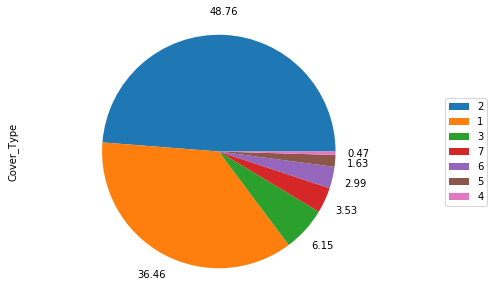

In [52]:
# PIE CHART OF COVER TYPE

soil['Cover_Type'].value_counts().plot(kind='pie',labels=None, autopct='%.2f', pctdistance=1.2)
plt.legend(labels = soil['Cover_Type'].value_counts().index, loc="right", bbox_to_anchor=(1.2, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

### A - EXPLORE PAIRS OF ATTRIBUTES

Text(0.5,1,'Elevation vs Slope')

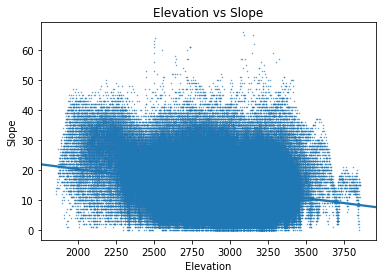

In [53]:
# Regression plot of Elevation vs Slope
sns.regplot(x="Elevation", y="Slope", data=soil, marker='o', scatter_kws={'s':0.2}).set_title('Elevation vs Slope')

Text(0.5,1,'Cover Type vs Elevation')

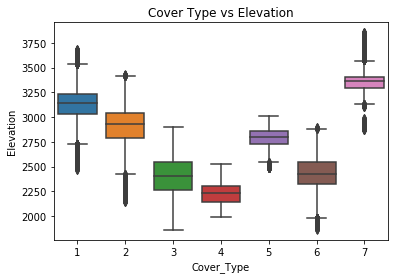

In [54]:
# Cover Type vs Elevation
sns.boxplot(x=soil["Cover_Type"], y=soil["Elevation"]).set_title('Cover Type vs Elevation')

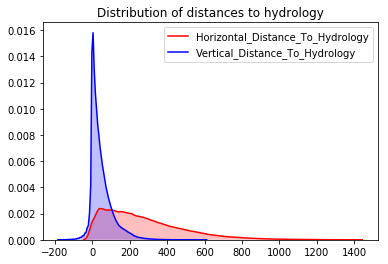

In [55]:
# Distribution of distances to hydrology

p1=sns.kdeplot(soil['Horizontal_Distance_To_Hydrology'], shade=True, color="r").set_title('Distribution of distances to hydrology')
p1=sns.kdeplot(soil['Vertical_Distance_To_Hydrology'], shade=True, color="b")

Text(0.5,1,'Aspect Ratio vs Hillshade Index at noon')

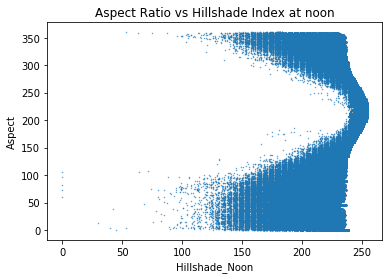

In [56]:
# Aspect Ratio vs Hillshade Index at noon

sns.regplot(x="Hillshade_Noon", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Aspect Ratio vs Hillshade Index at noon')

Text(0.5,1,'Aspect Ratio vs Hillshade Index at 3pm')

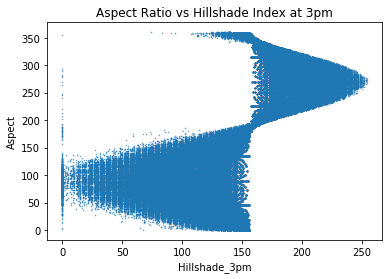

In [57]:
# Aspect Ratio vs Hillshade Index at 3pm

sns.regplot(x="Hillshade_3pm", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Aspect Ratio vs Hillshade Index at 3pm')

Text(0.5,1,'Aspect Ratio vs Hillshade Index at 3pm')

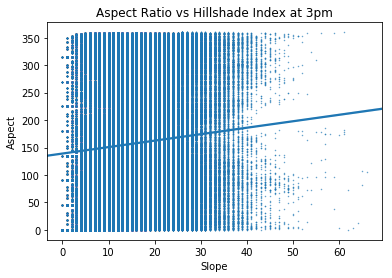

In [58]:
# Aspect Ratio vs Hillshade Index at 3pm

sns.regplot(x="Slope", y="Aspect", data=soil, marker='o', scatter_kws={'s':0.2}).set_title('Aspect Ratio vs Hillshade Index at 3pm')

In [59]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 57 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null int64
Wilderness_Area_02                    581012 non-null int64
Wilderness_Area_03                    581012 non-null int64
Wilderness_Area_04                    581012 non-null int64
Soil_Type_01                          581012 non-

Text(0.5,1,'Elevation vs Vertical Distance To Land Water Feature (Hyrdology)')

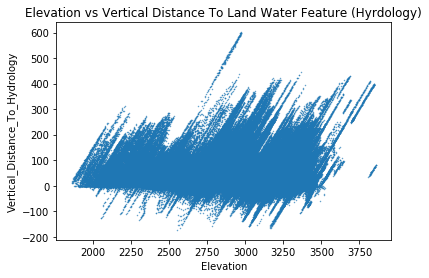

In [60]:
# Vertical Distance to Hyrdology vs Elevation

sns.regplot(x="Elevation", y="Vertical_Distance_To_Hydrology", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Vertical Distance To Land Water Feature (Hyrdology)')

Text(0.5,1,'Elevation vs Horizontal Distance To Roadways')

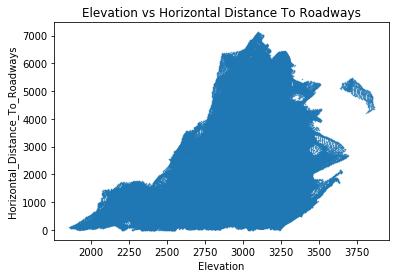

In [61]:
# Vertical Distance to Hyrdology vs Elevation

sns.regplot(x="Elevation", y="Horizontal_Distance_To_Roadways", data=soil, marker='o', scatter_kws={'s':0.2}, fit_reg=False).set_title('Elevation vs Horizontal Distance To Roadways')

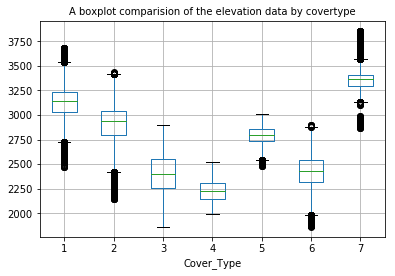

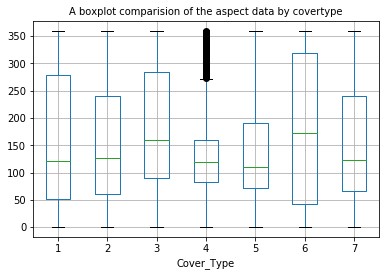

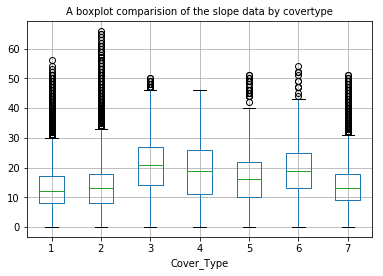

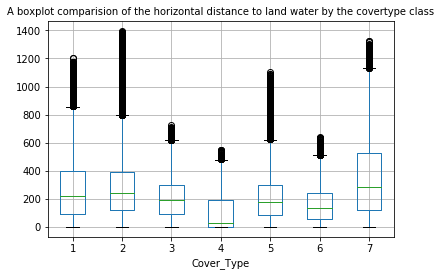

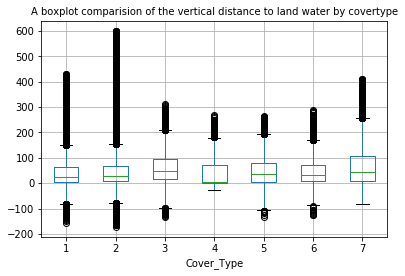

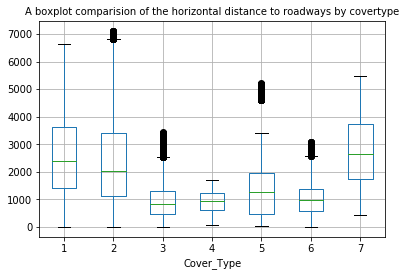

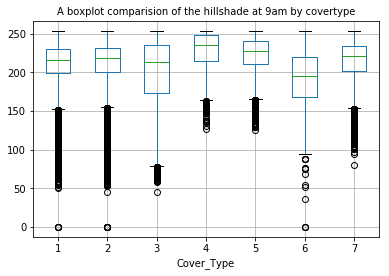

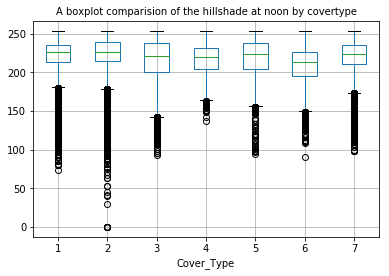

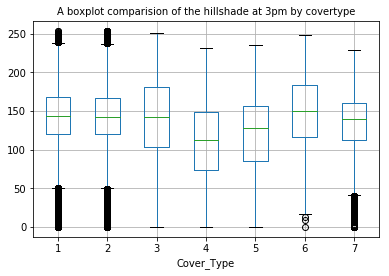

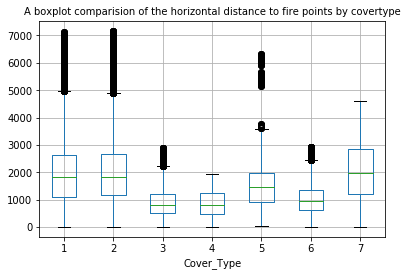

IndexError: list index out of range

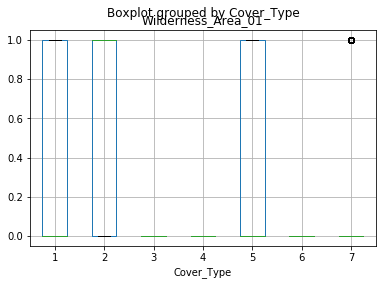

In [62]:
# All numerical variables grouped by the covertype class

for col in soil.columns:
    if (soil[col].dtype.name  == 'int64'):
        plt.figure(col,figsize=(30, 30))
        title=["A boxplot comparision of the elevation data by covertype","A boxplot comparision of the aspect data by covertype","A boxplot comparision of the slope data by covertype","A boxplot comparision of the horizontal distance to land water by the covertype class", "A boxplot comparision of the vertical distance to land water by covertype","A boxplot comparision of the horizontal distance to roadways by covertype","A boxplot comparision of the hillshade at 9am by covertype", "A boxplot comparision of the hillshade at noon by covertype","A boxplot comparision of the hillshade at 3pm by covertype", "A boxplot comparision of the horizontal distance to fire points by covertype"]
        index = soil.columns.get_loc(col)
        soil.boxplot(column=col, by="Cover_Type")
        plt.title(title[index], fontsize=10)
        plt.suptitle("")
        filetitle="boxplot_"+str(soil[col].name)+"_byCovertype.png"
        plt.savefig(filetitle)
        plt.show()



In [ ]:
# All numerical variables grouped wilderness area
# Code not finished yet. I want to see breakdowns of each Wilderness area (maybe as boxplot?)


In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(soil,alpha=0.2,figsize=(80, 80),diagonal='hist')

In [63]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 57 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area_01                    581012 non-null int64
Wilderness_Area_02                    581012 non-null int64
Wilderness_Area_03                    581012 non-null int64
Wilderness_Area_04                    581012 non-null int64
Soil_Type_01                          581012 non-

In [66]:
soil_features_selected = soil[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Cover_Type','Wilderness_Type','Soil_Type']]

In [67]:
soil_features_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 12 columns):
Elevation                           581012 non-null int64
Aspect                              581012 non-null int64
Slope                               581012 non-null int64
Horizontal_Distance_To_Hydrology    581012 non-null int64
Vertical_Distance_To_Hydrology      581012 non-null int64
Horizontal_Distance_To_Roadways     581012 non-null int64
Hillshade_9am                       581012 non-null int64
Hillshade_Noon                      581012 non-null int64
Hillshade_3pm                       581012 non-null int64
Cover_Type                          581012 non-null category
Wilderness_Type                     581012 non-null category
Soil_Type                           581012 non-null int64
dtypes: category(2), int64(10)
memory usage: 45.4 MB


In [69]:
soil_set_wild1_mask = soil_features_selected['Wilderness_Type'] == 1

In [71]:
soil_set_wild1_mask.value_counts()

False    320216
True     260796
Name: Wilderness_Type, dtype: int64

In [72]:
soil_set_wild1 = soil_features_selected.loc[soil_set_wild1_mask]

In [74]:
soil_set_wild1.shape

(260796, 12)

In [75]:
soil_set_wild1['Wilderness_Type'].value_counts()

1    260796
4         0
3         0
2         0
Name: Wilderness_Type, dtype: int64